In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lgca import get_lgca
from math import sqrt

In [2]:
ca = get_lgca(geometry='square', dims=(3,3), restchannels=1)

Random walk interaction is used.


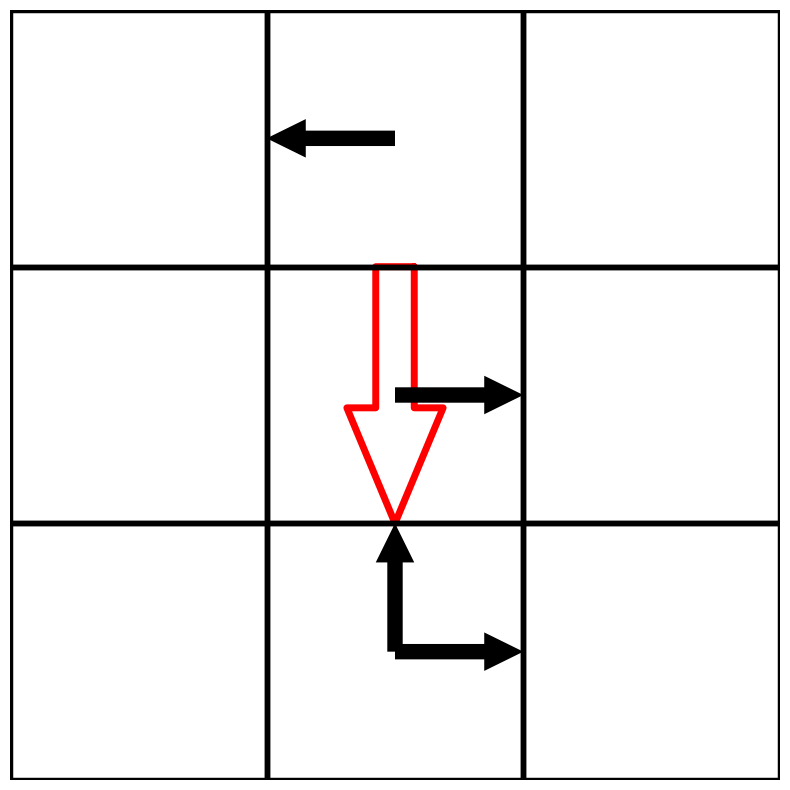

In [24]:
ca.nodes[...] = 0
ca.nodes[2, 2, 0] = 1
ca.nodes[2, 1, [0, 1]] = 1
ca.nodes[2, 1, 0] = 1
ca.nodes[2, 3, 2] = 1
ca.update_dynamic_fields()
conc = np.zeros(ca.cell_density[ca.nonborder].shape)
conc[0, 2] = 3
conc[0, 1] = 2
conc[1, 2] = 2
np.fill_diagonal(conc, 1)
# ca.plot_density(conc, cmap='Oranges', cbar=False, vmax=3)

g_align = ca.calc_flux(ca.nodes)
g_align = ca.nb_sum(g_align)
g_agg = ca.gradient(ca.cell_density)# ca.nb_sum(g)[2, 2] * 0.5
gx1, gy1 = g_agg[2, 2]
gx2, gy2 = g_align[2, 2]
g_chem = ca.gradient(conc) / 2
gx3, gy3 = g_chem[1, 1]
#plt.arrow(ca.xcoords[1, 1]+0.25, ca.ycoords[1, 1]-0.25, -1, 1, fc='r', ec='none', width=0.1, head_starts_at_zero=False)
q = plt.quiver(ca.xcoords[1, 1], ca.ycoords[1, 1], gx1, gy1, fc='none', ec='r', lw=5, pivot='mid', angles='xy', scale_units='xy', scale=1,
           width=0.05, headlength=3, headaxislength=3, headwidth=2.5, minlength=0, joinstyle='round', capstyle='round')
ca.plot_config(grid=True)
# q = plt.quiver(ca.xcoords[1, 1], ca.ycoords[1, 1], gx2, gy2, fc='none', ec='r', lw=5, pivot='mid', angles='xy', scale_units='xy', scale=1,
#            width=0.05, headlength=3, headaxislength=3, headwidth=2.5, minlength=0, joinstyle='round', capstyle='round')
# q = plt.quiver(ca.xcoords[1, 1], ca.ycoords[1, 1], gx3, gy3, fc='none', ec='r', lw=5, pivot='mid', angles='xy', scale_units='xy', scale=1,
#            width=0.05, headlength=3, headaxislength=3, headwidth=2.5, minlength=0, joinstyle='round', capstyle='round')
plt.axis('off')
#plt.text(ca.xcoords[1, 1], ca.ycoords[1, 1], '$\\vec{G}$', c='r', ha='center', va='center', size=20)
plt.savefig('aggr_sketch.pdf', bbox_inches=0)

In [ ]:
lgca = get_lgca(geometry='square', interaction='chemotaxis', density=0.2, beta=2.)

In [ ]:
lgca.timeevo(100, record=True)

In [ ]:
lgca.plot_density()
g = lgca.g[lgca.nonborder]
gx, gy = g[..., 0], g[..., 1]
mask = np.zeros(gx.shape, dtype=bool)
mask[[0, -1], :] = 1
mask[:, [0, -1]] = 1
mask[21:30, 21:30] = 1
gx = np.ma.array(gx, mask=mask)
c = lgca.concentration
lw = 5. * c / c.max()
ind = np.where(c == c.max())
x0, y0 = lgca.xcoords[ind], lgca.ycoords[ind]
theta = np.linspace(0, 2 * np.pi, 16, endpoint=False)
points = np.array([x0 + 5 ])
plt.streamplot(lgca.xcoords[:, 0], lgca.ycoords[0], gx.T, gy.T, cmap='Oranges', color=c, linewidth=lw, density=[1, 0.5])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('agg_pattern.pdf', bbox_inches=0)